<a href="https://colab.research.google.com/github/By-Lucas/Visao-Computacional-IA/blob/main/Vis%C3%A3o_Computacional_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visão computacional | Reconhecimento de imagem

## Detecção de faces

In [ ]:
import cv2 # OpenCV

In [7]:
imagem = cv2.imread('/content/imagens/faces.jpg')

In [ ]:
#cv2.imshow(imagem)
from google.colab.patches import cv2_imshow # Importar para exibir a imagem
cv2_imshow(imagem) #Exibindo a imagem colorida

In [9]:
detector_face = cv2.CascadeClassifier('/content/arquivos/haarcascade_frontalface_default.xml')

In [ ]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) #A face cinza demora menos tempo para carregar
cv2_imshow(imagem_cinza) 

In [11]:
deteccoes = detector_face.detectMultiScale(imagem_cinza, scaleFactor=1.3, minSize=(30,30))
# scaleFactor=1.3, minSize=(30,30)> Faz analise como se fosse um zoom e tamanho minimo da face para poder identificar melhora 

In [12]:
deteccoes #detectar matrizes das faces

array([[289,  87,  48,  48],
       [485,  95,  49,  49],
       [160, 102,  42,  42],
       [ 58, 121,  46,  46],
       [381, 124,  47,  47]], dtype=int32)

In [13]:
len(deteccoes)

5

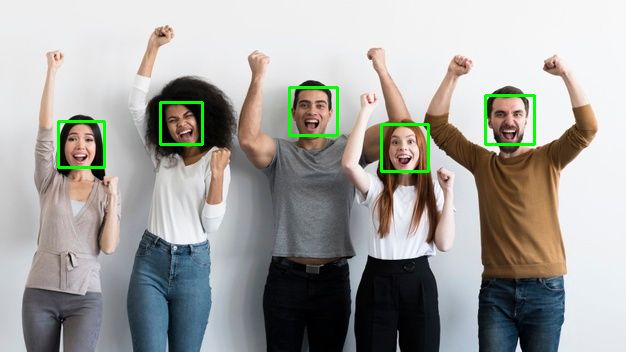

In [14]:
for (x, y, l, a) in deteccoes: #esquerda, direita, largura, altura
  #print(x, y, l, a)
  cv2.rectangle(imagem, (x, y), (x + l, y + a), (0,255,0), 2) #Desenhar a caixinha que fica detectando o rotsto
cv2_imshow(imagem)

## Detecção do corporal

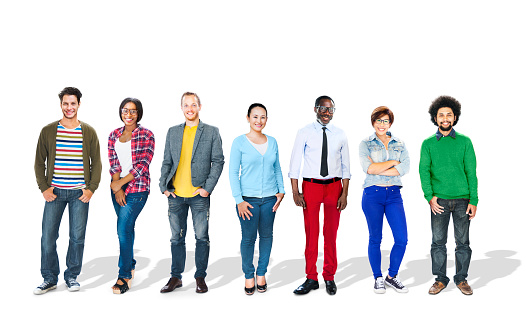

In [36]:
image = cv2.imread('/content/imagens/corpos.jpg')
cv2_imshow(image)

6
[[  2  72 118 236]
 [128  78 114 229]
 [388  74 116 232]
 [213 142  82 164]
 [340 126  90 179]
 [271 122  93 186]]


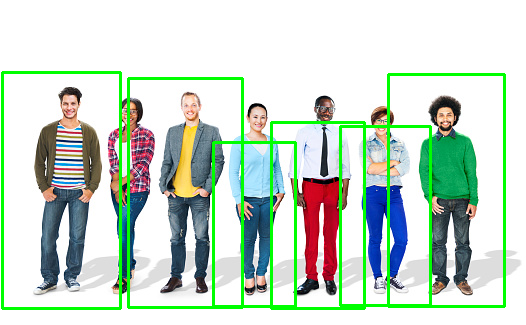

In [37]:
# Detectar corpo, converte para cinza para carregar mais rapido, em seguida printa a cor normal da imagem
detector_corpo = cv2.CascadeClassifier('/content/arquivos/haarcascade_fullbody.xml')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = detector_corpo.detectMultiScale(image_gray, scaleFactor=1.2, minSize=(50,50)) #50, 50
print(len(detections))
print(detections)
for (x, y, l, a) in detections:
  cv2.rectangle(image, (x, y), (x + l, y + a), (0,255,0), 2)
cv2_imshow(image)

## Reconhecimento facial

### Treinamento

In [ ]:
from PIL import Image
import numpy as np

In [39]:
from google.colab import drive
drive.mount('/content/drive') #Faz conexão com google driver

Mounted at /content/drive


In [40]:
import zipfile #Descmpactar a base
path = '/content/drive/MyDrive/inteligencia artificial/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
import os
os.listdir('/content/yalefaces/treinamento')

In [41]:
def dados_imagem():
  caminhos = [os.path.join('/content/yalefaces/treinamento', f) for f in os.listdir('/content/yalefaces/treinamento')]
  faces = []
  ids = []
  for caminho in caminhos:
    if caminho == '/content/yalefaces/treinamento/.ipynb_checkpoints':
      continue #para nao dar erro d arquivo inexistente
    imagem = Image.open(caminho).convert('L') # conversao em escala de cinsa. um canal
    imagem_np = np.array(imagem, 'uint8')
    id = int(os.path.split(caminho)[1].split('.')[0].replace('subject', ''))# No caminho completo, busca somente o numero da imagem
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces

In [42]:
ids, faces = dados_imagem()

In [ ]:
print(ids)

In [ ]:
print(faces[0])

In [52]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('/content/arquivos/classificadorLBPH.yml') #cria o arquivo para classificar as imagens

### Classificação

In [53]:
reconhecedor = cv2.face.LBPHFaceRecognizer_create()
reconhecedor.read('/content/arquivos/classificadorLBPH.yml') #ler

In [54]:
imagem_teste = '/content/yalefaces/teste/subject12.rightlight.gif' 
# Copiar o local da imagem que dseja verificar se consta no bando de imagens

In [55]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
print(imagem_np)

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [238 235 227 ... 255 255 255]
 [239 235 230 ... 255 255 255]
 [ 68  68  68 ...  68  68  68]]


In [56]:
idprevisto, _ = reconhecedor.predict(imagem_np) #Fazer a previsão da imagen
idprevisto

12

In [57]:
idcorreto = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
idcorreto

12

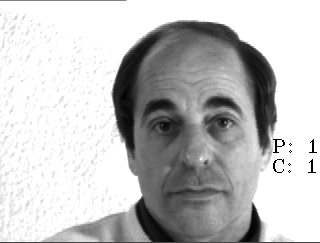

In [58]:
cv2.putText(imagem_np, 'P: ' + str(idprevisto), (x,y + 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'C: ' + str(idcorreto), (x,y + 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)

# Rastreamento e reconhecimento de rostos
## Abrir os código abaixo no EX: VSCODE, PYCHARM




In [3]:
import os
import cv2
import torch

import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import numpy as np
from google.colab.patches import cv2_imshow
 


In [ ]:

users_path = os.path.join(os.getcwd(), 'users')

def save_user(root_path, username):
    
    save_path = os.path.join(root_path, username)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    
    vid = cv2.VideoCapture(0) 

    imgs = []
    while(True): 

        # Capture the video frame 
        # by frame ppppppppq
        ret, frame = vid.read() 

        # resultado em webcam, abrir usando vscode, pycharm, etc
        cv2.imshow('frame', frame)

        #Aperte botao ESC para sair
        # Aperte w para tirar fotos para reconhecimento
        # Quando chegar em 10 fotos ele para

        if cv2.waitKey(1) & 0xFF == ord('w'):
            imgs.append(frame)
            cv2.imwrite(os.path.join(save_path, '{0}.png'.format(len(imgs))), frame)
            print('{0} frames capturados'.format(len(imgs)))
            
            if len(imgs) == 10: break

        if cv2.waitKey(1) & 0xFF == 27: 
            break

    
    vid.release() 
  
    cv2.destroyAllWindows() 
    
save_user(users_path, 'lucas') #Cria uma pasta com nome lucas e salva as imagens

# Baixar o modelo treinado para reconhecimento de faces
# Pode demorar um pouco!

In [5]:
import requests

if not os.path.isfile('resnet50_ft_dag.pth'):
    weights_path = 'http://www.robots.ox.ac.uk/~albanie/models/pytorch-mcn/resnet50_ft_dag.pth'
    r = requests.get(weights_path, allow_redirects=True)

    open('resnet50_ft_dag.pth', 'wb').write(r.content)

In [ ]:
import mtcnn
from resnet50_ft_dag import resnet50_ft_dag

detector = mtcnn.MTCNN()
model = resnet50_ft_dag('resnet50_ft_dag.pth')
print(model)

# Guardando features e métricas de referência de cada usuário

In [ ]:
# Função para extração de características a partir de uma imagem
def extract_features(pixels):
    pixels = np.array(pixels, dtype=np.uint8)
    
    # Recortando a face para poder identificar melhor 
    faces = detector.detect_faces(pixels)
    print(faces)
    x, y, width, height = faces[0]['box']
    face = pixels[y:y+height, x:x+width]
    
    # Plot da imagem e da face recortada
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].imshow(pixels)
    axs[1].imshow(face)
    
    # extrai caracteristicas de alto nível
    face = Image.fromarray(face, 'RGB')
    face = transforms.Resize( (224, 224) )(face)
    face = transforms.ToTensor()(face).unsqueeze(0)
    
    class_, feature = model(face) 
    
    return feature.detach().cpu().data.squeeze()
    
imagem = Image.open(os.path.join(users_path, 'fotos', '1.png'))
feature = extract_features(imagem)
print(feature.shape)

In [ ]:
from torch import nn

metric = nn.L1Loss()
# Faz todo o registro do usuario
def registra_usuario(usuario):
    
    user_path = os.path.join(users_path, usuario)
    all_features = []
    for img in os.listdir(user_path):
        if img[-3:] != 'png': continue
            
        pixels = Image.open(os.path.join(user_path, img))
        feature = extract_features(pixels)
        
        all_features.append(feature)
        
    all_losses = []
    for k in range(len(all_features)):
        for j, feat in enumerate(all_features):
            if k == j: continue
            all_losses.append(metric(all_features[k], feat) )
    
    all_losses = np.asarray(all_losses)
    print(np.mean(all_losses), np.std(all_losses))
    
    all_features = np.asarray([feat.numpy() for feat in all_features])
    np.savez_compressed(os.path.join(user_path, 'referencia'), all_feats=all_features, 
                                                          mean=np.mean(all_losses),
                                                          std=np.std(all_losses))
    


# Teste com imagens nunca antes vistas!

In [ ]:
def get_new_img():

    vid = cv2.VideoCapture(0) 

    ret = []
    while(True): 
        ret, frame = vid.read() 
        cv2.imshow('frame', frame) 

        if cv2.waitKey(1) & 0xFF == ord('w'):
            ret = frame
            print('1 frame capturado')
            break

        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break

    vid.release() 
    cv2.destroyAllWindows() 
    
    return ret

In [ ]:
# Pega nova imagem
pixels = cv2.cvtColor(get_new_img(), cv2.COLOR_BGR2RGB)
feature = extract_features( pixels )

# Compara feature da nova imagem com as referências
# previamente armazenadas.
reconhecido = False
for user in os.listdir(users_path):
    
    referencia = np.load(os.path.join(users_path, user, 'referencia.npz'))
    all_features = referencia['all_feats']
    mean = referencia['mean']
    std  = referencia['std']
    
    all_dist = []
    for feat in all_features:
        all_dist.append(metric(feature, torch.from_numpy(feat) ))
        
    # Critério de identificação. Para cada usuário:
    #    calcule a média da distância da nova imagem com todas as imagens de referência
    #    compare com a média da diferença das imagens de referência entre si
    #    se a diferença estiver dentro de 1 desvio padrão, é possível que seja a pessoa!
    
    if abs( np.mean(all_dist) - mean ) < std:
        print('Identidade:', user.capitalize())
        reconhecido = True
        
if not reconhecido:
    print('Usuário não identificado')
    
